# Telecom churn case study

In the telecom industry, customers are able to choose from multiple service providers and 
actively switch from one operator to another. In this highly competitive market, the telecommunications industry
experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer 
than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

 The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) 
 from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
#importing imporant libraries for reading data and visualization

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
pd.options.mode.chained_assignment = None

In [2]:
#to display all the columns
pd.set_option('display.max_columns', None)

#to display all the rows
pd.set_option('display.max_rows', None)

#display all float to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#reading the csv file
telecom = pd.read_csv('telecom_churn_data.csv')

#displaying the head of the dataframe
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [4]:
#insights about the data

#shape of the dataframe
print('telecom Shape: ', telecom.shape)

#adding spacing
print('-'*80, '\n')

#checking info
print("telecom Info: \n"); telecom.info(verbose=1)


telecom Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

telecom Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6 

we can observe that there are 
179 columns as (float64)
35  columns as (int64)
12  columns as (object)

In [5]:
# checking the statistics of the data
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

In [6]:
#segregating all the columns in to different categories
Id_columns = ['mobile_number','circle_id']

numeric_col = []
categorical_col = []
for col in list(telecom.columns):
    if telecom[col].dtype in ['float64','int64']:
        numeric_col.append(col)
    else:
        categorical_col.append(col)
#date columns        
date_columns = list(telecom.loc[:,telecom.columns.str.contains('date')].columns)
#recharge columns
recharge_columns = list(telecom.loc[:,telecom.columns.str.contains('_rech_')].columns)

In [7]:
# printing all the values
print('numeric_col =',len(numeric_col))
print('categorical_col =',len(categorical_col))

numeric_col = 214
categorical_col = 12


## Data preparation

### Handling missing values

In [8]:
#checking the list of categorical columns
print(categorical_col)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [9]:
# Columns with more than 70% missing values
missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
missing_data[missing_data >= 70]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

In [10]:
#printing all the recharge columns
print(recharge_columns)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [11]:
# we can observe that many recharge columns have more than more than 70% missing values
# we use the date columns to verify if there is any pattern
telecom.loc[telecom.total_rech_data_6.isnull() & telecom.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6
1,nan,NaN
2,nan,NaN
3,nan,NaN
5,nan,NaN
6,nan,NaN
7,nan,NaN
8,nan,NaN
9,nan,NaN
10,nan,NaN
11,nan,NaN


In [12]:
telecom.loc[telecom.total_rech_data_7.isnull() & telecom.date_of_last_rech_data_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head(20)

,total_rech_data_7,date_of_last_rech_data_7
2,nan,NaN
3,nan,NaN
4,nan,NaN
5,nan,NaN
6,nan,NaN
7,nan,NaN
10,nan,NaN
11,nan,NaN
12,nan,NaN
13,nan,NaN


we can observe that for corresponding missing value in date column there is a missing value in recharge column
Hence, we impute the recharge columns with 0 such that for a particular date there was no recharge

In [13]:
telecom[recharge_columns] = telecom[recharge_columns].apply(lambda x : x.fillna(0))

In [14]:
#again checking the data for more than 70% missing values
missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
missing_data[missing_data >= 70]

arpu_3g_6          74.85
arpu_3g_7          74.43
arpu_3g_8          73.66
arpu_3g_9          74.08
arpu_2g_6          74.85
arpu_2g_7          74.43
arpu_2g_8          73.66
arpu_2g_9          74.08
night_pck_user_6   74.85
night_pck_user_7   74.43
night_pck_user_8   73.66
night_pck_user_9   74.08
fb_user_6          74.85
fb_user_7          74.43
fb_user_8          73.66
fb_user_9          74.08
dtype: float64

In [15]:
## All the remaining data that have more than 70% missing value will not be useful in predicting churners, Hence we remove them

missing_data = missing_data[missing_data > 70].index
telecom.drop(missing_data, axis=1, inplace=True)

In [16]:
# we have already drawn inference from date columns and they won't be useful for further analysis thus we can drop them
telecom = telecom.drop(date_columns,axis =1)

In [17]:
#checking shape after dopping columns initially
telecom.shape

(99999, 198)

In [18]:
#checking for columns that have no varience
# i.e either they have alll values as 0 or all values as 1
#such columns will not contribute to our solution and hence needs to be removed
telecom_unique_count = telecom.nunique().sort_values(ascending=False)

telecom_unique_count_0 = telecom_unique_count[telecom_unique_count == 0]
print(telecom_unique_count_0)
telecom_unique_count_1 = telecom_unique_count[telecom_unique_count == 1]
print(telecom_unique_count_1)

columns_drop = list(telecom_unique_count_0.index) + list(telecom_unique_count_1.index)

telecom.drop(columns_drop, axis=1, inplace=True)


Series([], dtype: int64)
loc_ic_t2o_mou      1
circle_id           1
loc_og_t2o_mou      1
std_ic_t2o_mou_7    1
std_og_t2o_mou      1
std_og_t2c_mou_9    1
std_ic_t2o_mou_6    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_8    1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_ic_t2o_mou_9    1
dtype: int64


In [19]:
#Verify zero values across rows to identify empty rows 
# if values are 0 in all columns then the data is of no value so we can discard those rows

# Discard rows where all attributes have zero as value
telecom = telecom.loc[~(telecom==0).all(axis=1)]


In [20]:
telecom.shape

(99999, 186)

In [21]:
# checking for missing values in the remaing columns
missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
missing_data[missing_data >= 0.1]

onnet_mou_6        3.94
onnet_mou_7        3.86
onnet_mou_8        5.38
onnet_mou_9        7.75
offnet_mou_6       3.94
offnet_mou_7       3.86
offnet_mou_8       5.38
offnet_mou_9       7.75
roam_ic_mou_6      3.94
roam_ic_mou_7      3.86
roam_ic_mou_8      5.38
roam_ic_mou_9      7.75
roam_og_mou_6      3.94
roam_og_mou_7      3.86
roam_og_mou_8      5.38
roam_og_mou_9      7.75
loc_og_t2t_mou_6   3.94
loc_og_t2t_mou_7   3.86
loc_og_t2t_mou_8   5.38
loc_og_t2t_mou_9   7.75
loc_og_t2m_mou_6   3.94
loc_og_t2m_mou_7   3.86
loc_og_t2m_mou_8   5.38
loc_og_t2m_mou_9   7.75
loc_og_t2f_mou_6   3.94
loc_og_t2f_mou_7   3.86
loc_og_t2f_mou_8   5.38
loc_og_t2f_mou_9   7.75
loc_og_t2c_mou_6   3.94
loc_og_t2c_mou_7   3.86
loc_og_t2c_mou_8   5.38
loc_og_t2c_mou_9   7.75
loc_og_mou_6       3.94
loc_og_mou_7       3.86
loc_og_mou_8       5.38
loc_og_mou_9       7.75
std_og_t2t_mou_6   3.94
std_og_t2t_mou_7   3.86
std_og_t2t_mou_8   5.38
std_og_t2t_mou_9   7.75
std_og_t2m_mou_6   3.94
std_og_t2m_mou_7

In [22]:
# as we can observe that the remaining columns donot have more than 10% of missing values
# and as per our requirements and bussiness undertsanding we can impute these column with '0'
telecom = telecom.fillna(0)

#checking if the imputation worked or not
# Percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number        0.00
arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
arpu_9               0.00
onnet_mou_6          0.00
onnet_mou_7          0.00
onnet_mou_8          0.00
onnet_mou_9          0.00
offnet_mou_6         0.00
offnet_mou_7         0.00
offnet_mou_8         0.00
offnet_mou_9         0.00
roam_ic_mou_6        0.00
roam_ic_mou_7        0.00
roam_ic_mou_8        0.00
roam_ic_mou_9        0.00
roam_og_mou_6        0.00
roam_og_mou_7        0.00
roam_og_mou_8        0.00
roam_og_mou_9        0.00
loc_og_t2t_mou_6     0.00
loc_og_t2t_mou_7     0.00
loc_og_t2t_mou_8     0.00
loc_og_t2t_mou_9     0.00
loc_og_t2m_mou_6     0.00
loc_og_t2m_mou_7     0.00
loc_og_t2m_mou_8     0.00
loc_og_t2m_mou_9     0.00
loc_og_t2f_mou_6     0.00
loc_og_t2f_mou_7     0.00
loc_og_t2f_mou_8     0.00
loc_og_t2f_mou_9     0.00
loc_og_t2c_mou_6     0.00
loc_og_t2c_mou_7     0.00
loc_og_t2c_mou_8     0.00
loc_og_t2c_mou_9     0.00
loc_og_mou_6         0.00
loc_og_mou_7

Now we have a dataframe with no missing values 

# Filtering High Value Customers
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. We predict churn only for the high-value customers. Here we have defined high-value customers as those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase - June and July).

In [23]:
## Deriving new columns for total_data_recharge

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']

#Now that we have derived new columns we can drop the old ones
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
telecom.drop(drop_data_columns, axis=1, inplace=True)

In [24]:
# Filtering high-value customers

avg_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"] + 
                    telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"]) / 2.0

#we only have to retain customers that contribute to more than 70th percentile
#printing the 70th percentile cutoff amount.

amount_70_perc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amount_70_perc)

#retaining the >70th percentile customers

telecom = telecom[avg_rech_amt_6_7 >= amount_70_perc]

70 percentile of first two months avg recharge amount:  478.0


In [25]:
#looking at the data after filtering HVC
telecom.shape

(30001, 183)

# Identifying Churners and Tagging them.

In [26]:
# calculating total incoming and outgoing usage for goodmonths
# deriving new variables for calls 
telecom['total_calls_mou_9'] = telecom.total_ic_mou_9 + telecom.total_og_mou_9

In [27]:

# calculating total data usage fo goodmonths
# deriving new variables for data

telecom['total_internet_mb_9'] =  telecom.vol_2g_mb_9 + telecom.vol_3g_mb_9

In [28]:
## Tagging churners
X = telecom['total_calls_mou_9']  + telecom['total_internet_mb_9'] 

##assigning 0 for non churners and 1 for churers
telecom["churn"] = np.where(X, 0, 1)

# change data type to category
telecom.churn = telecom.churn.astype("category")

In [29]:
#calculating the churn
print("Churn Ratio:")
print(telecom.churn.value_counts()*100/telecom.shape[0])

Churn Ratio:
0   91.86
1    8.14
Name: churn, dtype: float64


### Now that we have clearly identified our high valued customers and tagged all the churners and not churners we can drop all the columns associated with the 9th month as we are supposed to pridect for the 9th month

In [30]:
##dropping all the columns assosiated with 9th month

telecom = telecom.filter(regex='[^9]$', axis=1)
telecom.shape
telecom = telecom.drop('sep_vbc_3g',axis =1)

In [31]:
# checking the shape of our dataframe
telecom.shape

(30001, 138)

#### After tagging churners and filtering High Valued customers we have
30,001 rows and 138 columns

# Data Visualisation and EDA

##### Good phase data _6,_7
##### Action phase  _8
##### Prediction phase  _9

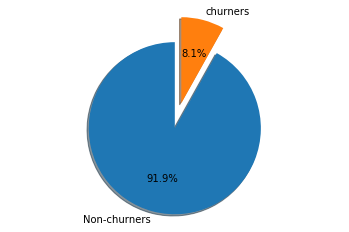

In [32]:
# plotting a pie chart for churners and non churners

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non-churners', 'churners'
sizes = [91.8, 8.1]
explode = (0, 0.3)  # only "explode" the 2nd slice (i.e. 'churners')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [33]:
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.00,252.00,252.00,1
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,0.00,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,154.

Looking at the data it is visible that there are categories that are divided into sub categories that makes them redundant and can be removed

In [34]:
# removing alll the total colums that represent single values of each month

#telecom['loc_og_mou_6'] = telecom[ 'loc_og_t2t_mou_6'] + telecom['loc_og_t2m_mou_6'] + telecom['loc_og_t2f_mou_6'] + telecom['loc_og_t2c_mou_6']
#telecom['loc_og_mou_7'] = telecom[ 'loc_og_t2t_mou_7'] + telecom['loc_og_t2m_mou_7'] + telecom['loc_og_t2f_mou_7'] + telecom['loc_og_t2c_mou_7']
#telecom['loc_og_mou_8'] = telecom[ 'loc_og_t2t_mou_8'] + telecom['loc_og_t2m_mou_8'] + telecom['loc_og_t2f_mou_8'] + telecom['loc_og_t2c_mou_8']
#telecom['loc_og_mou_9'] = telecom[ 'loc_og_t2t_mou_9'] + telecom['loc_og_t2m_mou_9'] + telecom['loc_og_t2f_mou_9'] + telecom['loc_og_t2c_mou_9']


loc_og = ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']

telecom = telecom.drop(loc_og, axis=1)

In [35]:
# removing alll the total colums that represent single values of each month

#telecom['std_og_mou_6'] = telecom[ 'std_og_t2t_mou_6'] + telecom['std_og_t2m_mou_6'] + telecom['std_og_t2f_mou_6'] 
#telecom['std_og_mou_7'] = telecom[ 'std_og_t2t_mou_7'] + telecom['std_og_t2m_mou_7'] + telecom['std_og_t2f_mou_7'] 
#telecom['std_og_mou_8'] = telecom[ 'std_og_t2t_mou_8'] + telecom['std_og_t2m_mou_8'] + telecom['std_og_t2f_mou_8']
#telecom['std_og_mou_9'] = telecom[ 'std_og_t2t_mou_9'] + telecom['std_og_t2m_mou_9'] + telecom['std_og_t2f_mou_9']


std_og = ['std_og_mou_6','std_og_mou_7','std_og_mou_8']

telecom = telecom.drop(std_og, axis=1)

In [36]:
# removing alll the total colums that represent single values of each month.

#telecom['total_og_mou_6'] = telecom[ 'std_og_mou_6'] + telecom['loc_og_mou_6'] + telecom['spl_og_mou_6'] + telecom['isd_og_mou_6'] + telecom['ic_others_6']
#telecom['total_og_mou_7'] = telecom[ 'std_og_mou_7'] + telecom['loc_og_mou_7'] + telecom['spl_og_mou_7'] + telecom['isd_og_mou_7'] + telecom['ic_others_7']
#telecom['total_og_mou_8'] = telecom[ 'std_og_mou_8'] + telecom['loc_og_mou_8'] + telecom['spl_og_mou_8'] + telecom['isd_og_mou_8'] + telecom['ic_others_8']
#telecom['total_og_mou_9'] = telecom[ 'std_og_mou_9'] + telecom['loc_og_mou_9'] + telecom['spl_og_mou_9'] + telecom['isd_og_mou_9'] + telecom['ic_others_9']


tot_og = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']

telecom = telecom.drop(tot_og, axis=1)

In [37]:
# removing alll the total colums that represent single values of each month

#telecom['loc_ic_mou_6'] = telecom[ 'loc_ic_t2t_mou_6'] + telecom['loc_ic_t2m_mou_6'] + telecom['loc_ic_t2f_mou_6'] + telecom['loc_ic_t2c_mou_6']
#telecom['loc_ic_mou_7'] = telecom[ 'loc_ic_t2t_mou_7'] + telecom['loc_ic_t2m_mou_7'] + telecom['loc_ic_t2f_mou_7'] + telecom['loc_ic_t2c_mou_7']
#telecom['loc_ic_mou_8'] = telecom[ 'loc_ic_t2t_mou_8'] + telecom['loc_ic_t2m_mou_8'] + telecom['loc_ic_t2f_mou_8'] + telecom['loc_ic_t2c_mou_8']
#telecom['loc_ic_mou_9'] = telecom[ 'loc_ic_t2t_mou_9'] + telecom['loc_ic_t2m_mou_9'] + telecom['loc_ic_t2f_mou_9'] + telecom['loc_ic_t2c_mou_9']


loc_ic = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']
telecom = telecom.drop(loc_ic, axis=1)

In [38]:
# removing alll the total colums that represent single values of each month

#telecom['std_ic_mou_6'] = telecom[ 'std_ic_t2t_mou_6'] + telecom['std_ic_t2m_mou_6'] + telecom['std_ic_t2f_mou_6'] + telecom['std_ic_t2o_mou_6']
#telecom['std_ic_mou_7'] = telecom[ 'std_ic_t2t_mou_7'] + telecom['std_ic_t2m_mou_7'] + telecom['std_ic_t2f_mou_7'] + telecom['std_ic_t2o_mou_7']
#telecom['std_ic_mou_8'] = telecom[ 'std_ic_t2t_mou_8'] + telecom['std_ic_t2m_mou_8'] + telecom['std_ic_t2f_mou_8'] + telecom['std_ic_t2o_mou_8']
#telecom['std_ic_mou_9'] = telecom[ 'std_ic_t2t_mou_9'] + telecom['std_ic_t2m_mou_9'] + telecom['std_ic_t2f_mou_9'] + telecom['std_ic_t2o_mou_9']


std_ic = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']

telecom = telecom.drop(std_ic, axis=1)

In [39]:
# removing alll the total colums that represent single values of each month

#telecom['total_ic_mou_6'] = telecom[ 'std_ic_mou_6'] + telecom['loc_ic_mou_6'] + telecom['spl_ic_mou_6'] + telecom['isd_ic_mou_6'] + telecom['ic_others_6']
#telecom['total_ic_mou_7'] = telecom[ 'std_ic_mou_7'] + telecom['loc_ic_mou_7'] + telecom['spl_ic_mou_7'] + telecom['isd_ic_mou_7'] + telecom['ic_others_7']
#telecom['total_ic_mou_8'] = telecom[ 'std_ic_mou_8'] + telecom['loc_ic_mou_8'] + telecom['spl_ic_mou_8'] + telecom['isd_ic_mou_8'] + telecom['ic_others_8']
#telecom['total_ic_mou_9'] = telecom[ 'std_ic_mou_9'] + telecom['loc_ic_mou_9'] + telecom['spl_ic_mou_9'] + telecom['isd_ic_mou_9'] + telecom['ic_others_9']


tot_ic = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

telecom = telecom.drop(tot_ic, axis=1)

In [40]:
telecom.shape

(30001, 120)

Now that we have the understanding that 6th and 7th month data are good phase we can combine the columns and derive new columns  that represents data from both months

In [41]:
telecom['total_rech_amt_6_7'] = (telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2
telecom['total_rech_num_6_7'] = (telecom['total_rech_num_6']+telecom['total_rech_num_7'])/2
telecom['onnet_mou_6_7'] = (telecom['onnet_mou_6']+telecom['onnet_mou_7'])/2
telecom['offnet_mou_6_7'] = (telecom['offnet_mou_6']+telecom['offnet_mou_7'])/2
telecom['roam_ic_mou_6_7'] = (telecom['roam_ic_mou_6']+telecom['roam_ic_mou_7'])/2
telecom['loc_og_t2t_mou_6_7'] = (telecom['loc_og_t2t_mou_6']+telecom['loc_og_t2t_mou_7'])/2
telecom['loc_og_t2m_mou_6_7'] = (telecom['loc_og_t2m_mou_6']+telecom['loc_og_t2m_mou_7'])/2
telecom['loc_og_t2f_mou_6_7'] = (telecom['loc_og_t2f_mou_6']+telecom['loc_og_t2f_mou_7'])/2
telecom['loc_og_t2c_mou_6_7'] = (telecom['loc_og_t2c_mou_6']+telecom['loc_og_t2c_mou_7'])/2
telecom['std_og_t2t_mou_6_7'] = (telecom['std_og_t2t_mou_6']+telecom['std_og_t2t_mou_7'])/2
telecom['std_og_t2t_mou_6_7'] = (telecom['std_og_t2m_mou_6']+telecom['std_og_t2m_mou_7'])/2
telecom['std_og_t2t_mou_6_7'] = (telecom['std_og_t2f_mou_6']+telecom['std_og_t2f_mou_7'])/2
telecom['std_ic_t2m_mou_6_7'] = (telecom['std_ic_t2t_mou_6']+telecom['std_ic_t2t_mou_7'])/2
telecom['std_ic_t2m_mou_6_7'] = (telecom['std_ic_t2m_mou_6']+telecom['std_ic_t2m_mou_7'])/2
telecom['std_ic_t2f_mou_6_7'] = (telecom['std_ic_t2f_mou_6']+telecom['std_ic_t2f_mou_7'])/2
telecom['ic_others_6_7'] = (telecom['ic_others_6']+telecom['ic_others_7'])/2
telecom['max_rech_amt_6_7'] = (telecom['max_rech_amt_6']+telecom['max_rech_amt_7'])/2
telecom['last_day_rch_amt_6_7'] = (telecom['last_day_rch_amt_6']+telecom['last_day_rch_amt_7'])/2
telecom['max_rech_data_6_7'] = (telecom['max_rech_data_6']+telecom['max_rech_data_7'])/2
telecom['count_rech_2g_6_7'] = (telecom['count_rech_2g_6']+telecom['count_rech_2g_7'])/2
telecom['count_rech_3g_6_7'] = (telecom['count_rech_3g_6']+telecom['count_rech_3g_7'])/2
telecom['vol_2g_mb_6_7'] = (telecom['vol_2g_mb_6']+telecom['vol_2g_mb_7'])/2
telecom['vol_3g_mb_6_7'] = (telecom['vol_3g_mb_6']+telecom['vol_3g_mb_7'])/2
telecom['monthly_2g_6_7'] = (telecom['monthly_2g_6']+telecom['monthly_2g_7'])/2
telecom['sachet_2g_6_7'] = (telecom['sachet_2g_6']+telecom['sachet_2g_7'])/2
telecom['monthly_3g_6_7'] = (telecom['monthly_3g_6']+telecom['monthly_3g_7'])/2
telecom['sachet_3g_6_7'] = (telecom['sachet_3g_6']+telecom['sachet_3g_7'])/2
telecom['vbc_3g_6_7'] = (telecom['jul_vbc_3g']+telecom['jun_vbc_3g'])/2
telecom['isd_ic_mou_6_7'] = (telecom['isd_ic_mou_6']+telecom['isd_ic_mou_7'])/2
telecom['spl_og_mou_6_7'] = (telecom['spl_og_mou_6']+telecom['spl_og_mou_7'])/2
telecom['loc_ic_t2t_mou_6_7'] = (telecom['loc_ic_t2t_mou_6']+telecom['loc_ic_t2t_mou_7'])/2
telecom['loc_ic_t2m_mou_6_7'] = (telecom['loc_ic_t2m_mou_6']+telecom['loc_ic_t2m_mou_6'])/2
telecom['loc_ic_t2f_mou_6_7'] = (telecom['loc_ic_t2f_mou_6']+telecom['loc_ic_t2f_mou_6'])/2
telecom['roam_og_mou_6_7'] = (telecom['roam_og_mou_6']+telecom['roam_og_mou_7'])/2
telecom['isd_og_mou_6_7'] = (telecom['isd_og_mou_6']+telecom['isd_og_mou_7'])/2
telecom['og_others_6_7'] = (telecom['og_others_6']+telecom['og_others_7'])/2
telecom['spl_ic_mou_6_7'] = (telecom['spl_ic_mou_6']+telecom['spl_ic_mou_7'])/2

### The model is supposed to be built on the voice and data usage and hence we donot need arpu data so we remove those columns

In [42]:
# now that we have derived new features we can remove the orignal columns along with arpu data
telecom = telecom.drop(['total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6',
                                 'roam_ic_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2f_mou_6','loc_og_t2f_mou_7',
                                  'loc_og_t2m_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_6','spl_og_mou_6','spl_og_mou_7',
                                  'loc_og_t2m_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7',
                                  'std_og_t2m_mou_6','std_og_t2m_mou_7','std_ic_t2m_mou_6','std_og_t2f_mou_6','std_og_t2f_mou_7',
                                  'std_ic_t2m_mou_7','std_ic_t2f_mou_6','std_ic_t2f_mou_7','ic_others_6','ic_others_7','max_rech_amt_6',
                                 'max_rech_amt_7','last_day_rch_amt_6','last_day_rch_amt_7',
                                 'max_rech_data_6','max_rech_data_7','count_rech_2g_6','count_rech_2g_7','count_rech_3g_6','count_rech_3g_7',
                                 'vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','monthly_2g_6','monthly_2g_7','sachet_2g_6','sachet_2g_7',
                                 'monthly_3g_6','monthly_3g_7','sachet_3g_6','sachet_3g_7','jul_vbc_3g','jun_vbc_3g','isd_ic_mou_6','isd_ic_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7',
                                'loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6',
                                  'loc_ic_t2f_mou_7','isd_og_mou_7','isd_og_mou_6',
                                 'roam_og_mou_6','roam_og_mou_7','og_others_6','og_others_7','spl_ic_mou_6',
                                 'spl_ic_mou_7'], axis=1)

In [43]:
## Checking the shape of our data after deriving new features from 6th and 7th month data
telecom.shape

(30001, 76)

In [44]:
telecom.columns

Index(['mobile_number', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'vol_2g_mb_8',
       'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'churn',
       'total_rech_amt_6_7', 'total_rech_num_6_7', 'onnet_mou_6_7',
       'offnet_mou_6_7', 'roam_ic_mou_6_7', 'loc_og_t2t_mou_6_7',
       'loc_og_t2m_mou_6_7', 'lo

Now we can plot the correlation heat map to check if the variables are correlated

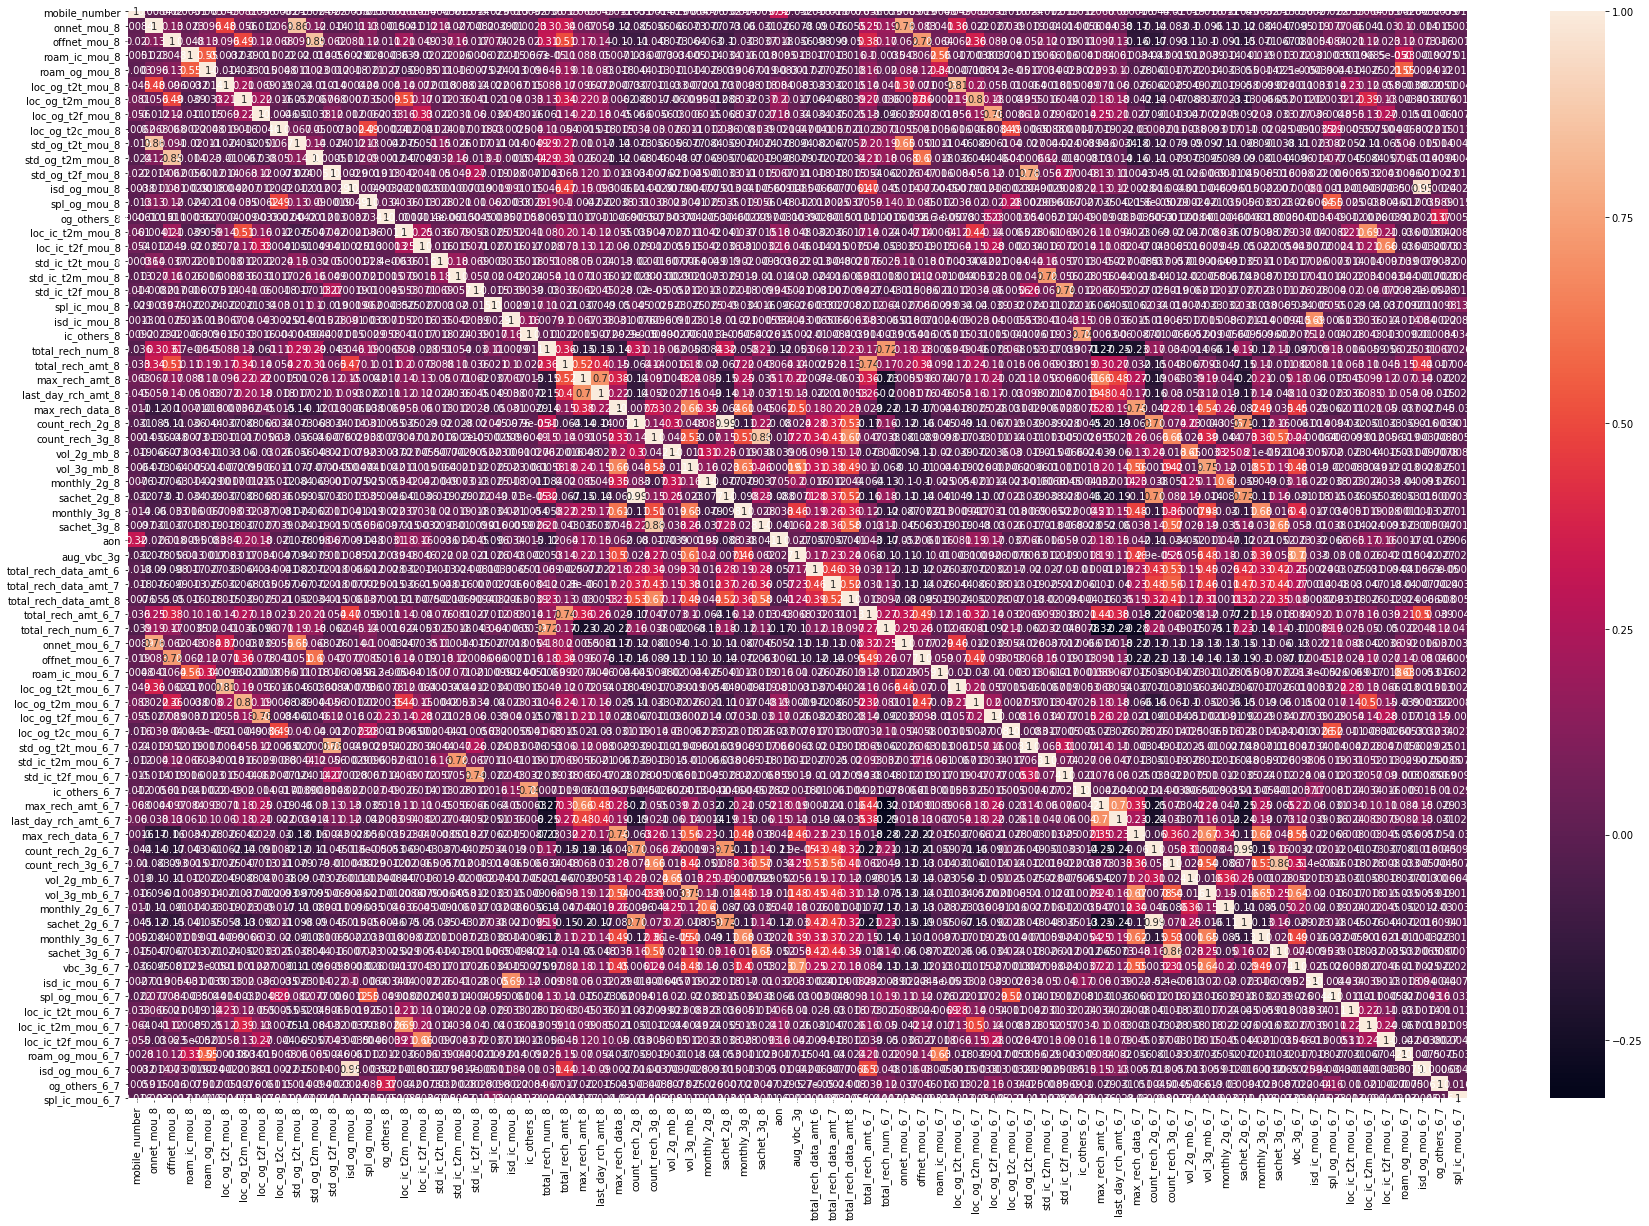

In [45]:
#correlation heatmap
plt.figure(figsize = (30,20))
sns.heatmap(telecom.corr(), annot=True)
plt.show()

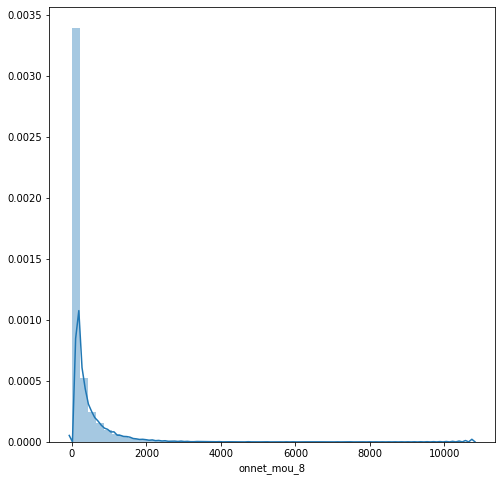

In [46]:
#onnetusage for 8th month
plt.figure(figsize=(8,8))
sns.distplot(telecom.onnet_mou_8)

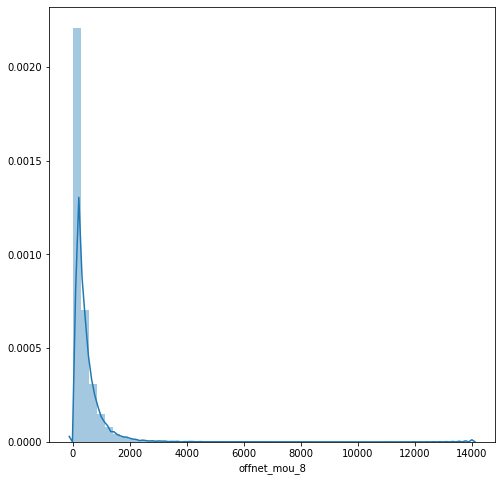

In [47]:
#offnetusage for month 8th
plt.figure(figsize=(8,8))
sns.distplot(telecom.offnet_mou_8)

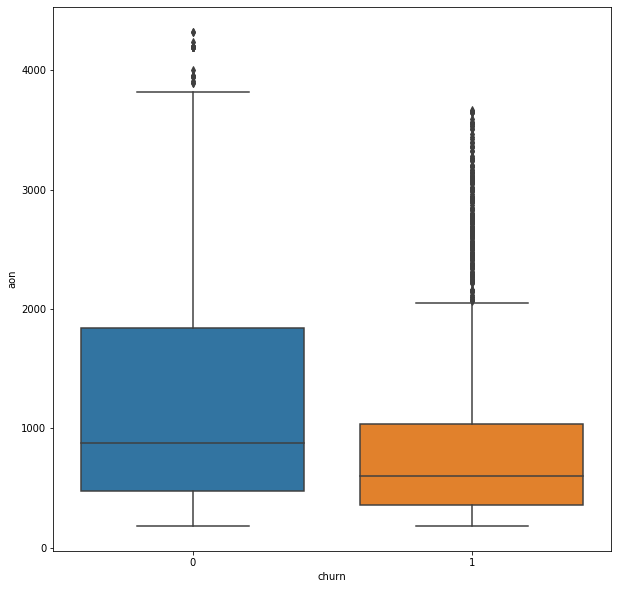

In [48]:
# churn vs aon
plt.figure(figsize=(10,10))
sns.boxplot(telecom.churn, telecom.aon)

In [49]:
#Converting the columns AON from days to years

telecom['aon_years']= telecom['aon']/365
telecom['aon_years'] = telecom['aon_years'].astype(int)

telecom = telecom.drop('aon', axis =1)

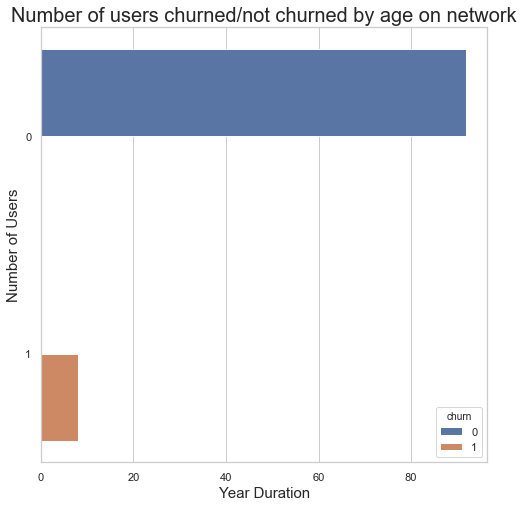

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,8))
sns.barplot(x='aon_years', y='churn', data=telecom,hue='churn',estimator=lambda x: len(x) / len(telecom) * 100).set_title("Number of users churned/not churned by age on network",fontsize=20)
plt.xlabel("Year Duration",fontsize=15)
plt.ylabel("Number of Users",fontsize=15)
plt.show()

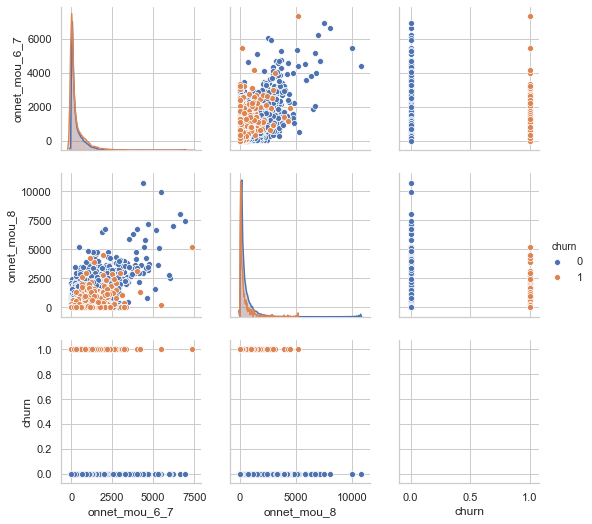

In [51]:
#onnet usage with churn
sns.pairplot(data=telecom[['onnet_mou_6_7','onnet_mou_8','churn']],hue='churn')

<Figure size 1080x1080 with 0 Axes>

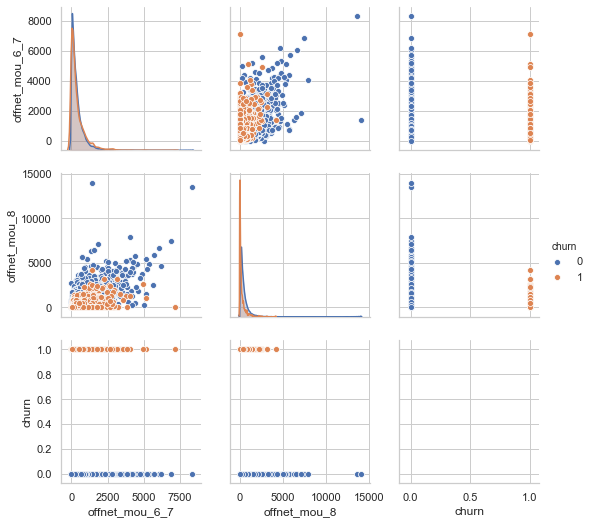

In [52]:
# plot to compare offnet usage with churn
plt.figure(figsize=(15,15))
sns.pairplot(data=telecom[['offnet_mou_6_7','offnet_mou_8','churn']],hue='churn')

<Figure size 1080x1080 with 0 Axes>

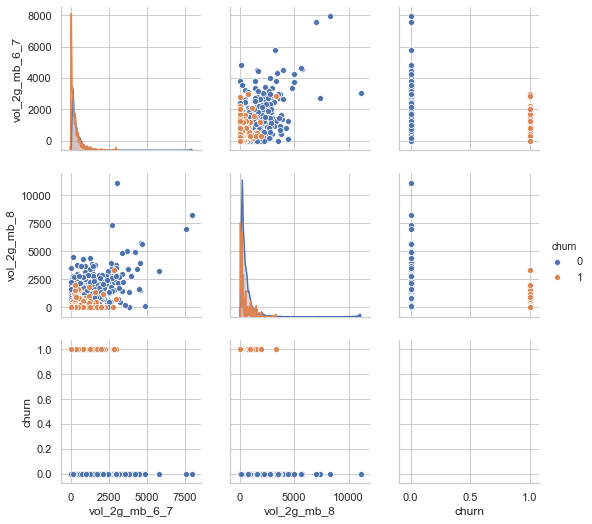

In [53]:
#2g internet usage
plt.figure(figsize=(15,15))
sns.pairplot(data=telecom[['vol_2g_mb_6_7','vol_2g_mb_8','churn']],hue='churn')

<Figure size 1080x1080 with 0 Axes>

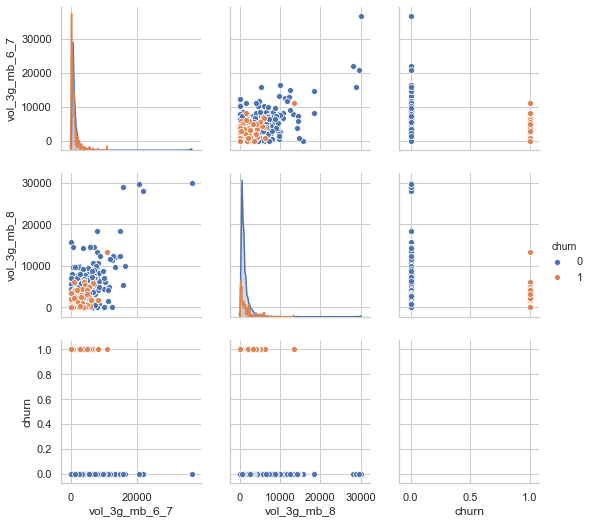

In [54]:
#3g internet usage
plt.figure(figsize=(15,15))
sns.pairplot(data=telecom[['vol_3g_mb_6_7','vol_3g_mb_8','churn']],hue='churn')

In [55]:
### Checking if there are any outliers in the data

In [56]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amt_6_7,total_rech_num_6_7,onnet_mou_6_7,offnet_mou_6_7,roam_ic_mou_6_7,loc_og_t2t_mou_6_7,loc_og_t2m_mou_6_7,loc_og_t2f_mou_6_7,loc_og_t2c_mou_6_7,std_og_t2t_mou_6_7,std_ic_t2m_mou_6_7,std_ic_t2f_mou_6_7,ic_others_6_7,max_rech_amt_6_7,last_day_rch_amt_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,sachet_2g_6_7,monthly_3g_6_7,sachet_3g_6_7,vbc_3g_6_7,isd_ic_mou_6_7,spl_og_mou_6_7,loc_ic_t2t_mou_6_7,loc_ic_t2m_mou_6_7,loc_ic_t2f_mou_6_7,roam_og_mou_6_7,isd_og_mou_6_7,og_others_6_7,spl_ic_mou_6_7,aon_years
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00
mean,7001206159.56,234.11,335.08,12.50,19.87,78.08,151.76,5.89,1.71,148.44,157.35,1.58,1.95,6.56,0.06,146.23,14.40,13.91,27.92,2.56,0.03,11.00,1.22,9.97,584.37,160.14,92.39,72.49,1.21,0.41,105.91,351.49,0.15,1.05,0.21,0.20,169.14,455.78,528.23,463.25,660.62,11.78,264.31,375.90,14.38,85.08,163.13,6.38,1.73,1.81,30.01,2.75,1.33,170.74,100.62,78.96,1.32,0.44,125.81,357.23,0.18,1.14,0.22,0.22,168.70,11.33,6.46,66.05,150.41,15.28,23.36,2.14,0.35,0.04,2.80
std,690878.42,458.45,482.06,74.13,104.72,227.37,233.66,19.50,7.21,397.56,409.10,10.93,44.71,20.31,3.32,214.88,43.31,71.34,103.34,19.90,0.11,70.60,12.78,9.27,611.25,173.21,145.18,110.57,2.54,1.28,313.38,919.02,0.41,2.54,0.62,1.10,420.97,1418.67,1476.04,1622.77,515.17,8.63,439.58,457.63,66.08,222.28,232.22,20.96,6.48,11.53,93.96,17.91,13.73,154.19,115.93,103.21,2.40,1.12,300.03,839.99,0.39,2.41,0.57,0.95,392.78,73.23,17.31,157.15,219.20,45.75,93.28,44.72,2.46,0.15,2.67
min,7000000074.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7000609293.00,10.39,46.74,0.00,0.00,2.53,13.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,250.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,409.00,6.50,20.62,83.14,0.00,6.46,24.70,0.00,0.00,0.00,0.70,0.00,0.00,102.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.54,28.08,0.00,0.00,0.00,0.00,0.00,1.00
50%,7001203434.00,65.61,182.79,0.00,0.00,20.73,67.76,0.00,0.00,0.63,9.46,0.00,0.00,0.43,0.00,80.04,1.68,0.11,3.71,0.00,0.00,0.00,0.00,8.00,490.00,130.00,50.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,92.00,100.00,25.00,568.50,9.50,92.03,235.57,0.00,26.69,82.43,0.64,0.00,0.00,7.00,0.00,0.00,128.00,77.00,25.00,0.50,0.00,6.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.74,27.34,84.06,1.84,0.00,0.00,0.00,0.

OBSERVATIONS
1. Data is higly imbalanced only 8.14% data is churn & remaining is non_churn
2. Features are highly correlated, use feature reduction methods before modelling.
3. since we are predicting usage based churn we do not need to treat outliers as they are exixting only in revenue based data which we already removed


# Data preparation for model building

In [57]:
# importing all the important libraries for model building

#libraries for standardising the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#library ti split data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#slearn libraries to build the model around the data
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection  import StratifiedKFold

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

Using TensorFlow backend.


In [58]:
## printing the shape and info of our data for building model

print('Dataframe Shape: ', telecom.shape)
print("Dataframe Info: \n"); telecom.info()

Dataframe Shape:  (30001, 76)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 76 columns):
mobile_number            30001 non-null int64
onnet_mou_8              30001 non-null float64
offnet_mou_8             30001 non-null float64
roam_ic_mou_8            30001 non-null float64
roam_og_mou_8            30001 non-null float64
loc_og_t2t_mou_8         30001 non-null float64
loc_og_t2m_mou_8         30001 non-null float64
loc_og_t2f_mou_8         30001 non-null float64
loc_og_t2c_mou_8         30001 non-null float64
std_og_t2t_mou_8         30001 non-null float64
std_og_t2m_mou_8         30001 non-null float64
std_og_t2f_mou_8         30001 non-null float64
isd_og_mou_8             30001 non-null float64
spl_og_mou_8             30001 non-null float64
og_others_8              30001 non-null float64
loc_ic_t2m_mou_8         30001 non-null float64
loc_ic_t2f_mou_8         30001 non-null float64
std_ic_t2t_mou_8         3000

In [59]:
telecom.head()

,mobile_number,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,total_rech_amt_6_7,total_rech_num_6_7,onnet_mou_6_7,offnet_mou_6_7,roam_ic_mou_6_7,loc_og_t2t_mou_6_7,loc_og_t2m_mou_6_7,loc_og_t2f_mou_6_7,loc_og_t2c_mou_6_7,std_og_t2t_mou_6_7,std_ic_t2m_mou_6_7,std_ic_t2f_mou_6_7,ic_others_6_7,max_rech_amt_6_7,last_day_rch_amt_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,sachet_2g_6_7,monthly_3g_6_7,sachet_3g_6_7,vbc_3g_6_7,isd_ic_mou_6_7,spl_og_mou_6_7,loc_ic_t2t_mou_6_7,loc_ic_t2m_mou_6_7,loc_ic_t2f_mou_6_7,roam_og_mou_6_7,isd_og_mou_6_7,og_others_6_7,spl_ic_mou_6_7,aon_years
0,7000842753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.13,1.15,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,0,0,1,0,30.40,252.00,252.00,252.00,1,307.00,3.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,252.00,252.00,252.00,0.00,1.00,15.72,117.16,0.00,0.00,1.00,0.00,50.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
7,7000701601,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.00,121.19,39.53,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0,0,0,0,57.74,0.00,0.00,0.00,1,1185.00,5.00,56.26,510.29,24.86,41.38,378.00,58.64,0.00,13.37,109.22,43.22,15.46,1185.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,8.29,2.25,45.20,217.56,152.16,18.16,0.09,0.00,0.10,2
8,7001524846,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.00,15.48,0.00,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,0,3,0,0,21.03,0.00,354.00,207.00,0,519.00,20.00,382.36,87.64,0.00,257.36,75.77,0.00,0.00,0.00,13.25,0.00,0.00,122.00,25.00,77.00,1.00,0.00,178.00,375.48,0.50,0.50,0.00,0.00,516.40,0.00,0.00,16.84,57.58,0.00,0.00,0.00,0.00,0.00,0
21,7002124215,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.00,129.16,10.39,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00,0,640.00,24.00,117.26,827.30,0.00,5.32,89.87,0.38,0.00,0.00,52.96,0.00,0.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.33,118.23,4.61,0.00,0.00,0.00,0.00,1
23,7000887461,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.00,146.84,0.71,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,0,0,1,1,40.45,0.00,712.00,540.00,0,227.00,4.00,49.81,87.38,0.00,49.81,82.97,0.00,0.00,0.00,8.66,0.00,2.67,89.50,89.50,89.50,0.00,1.00,0.24,299.55,0.00,0.00,1.00,0.00,25.93,14.12,0.05,40.88,95.91,0.00,0.00,0.01,0.00,0.00,1


#### First we create models that gives us predictions 
 ###### we first divide the data into train and test

In [60]:
# Create X (independent variable) & y (dependent variable) 
X = telecom.drop(['churn','mobile_number'], axis=1)
y = telecom['churn']

In [61]:
# apply scaling
scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

In [62]:
# split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=100)

In [63]:
print(X_train.shape)
print(X_test.shape)

(21000, 74)
(9001, 74)


In [64]:
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

Imbalance in Train Data: 0.08757574188202392
Imbalance in Test Data: 0.09089807296085323


## Building prediction models

## Using PCA for feature reduction

### We will build three models using PCA and choose the best amongst them

In [65]:
## we observed that there was high class imbalance and we need to deal with class imbalance before we build precitive models

### Balancing the data using smote for applying pca
## synthetic minority over sampling technique
sm1 = SMOTE(kind = "regular")
X_train,y_train = sm1.fit_sample(X_train,y_train)
print(X_train.shape)
print(y_train.shape)

(38618, 74)
(38618,)


In [66]:
## Applying pca
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [67]:
#displaying the array of components
pca.components_

array([[ 2.65724433e-02,  8.28826538e-02,  7.68349124e-02, ...,
         1.76997652e-02, -9.35524515e-03,  7.79763381e-02],
       [ 1.27303906e-01,  1.54922536e-01,  2.28192959e-01, ...,
         5.06487916e-02, -2.46874773e-03,  4.45060372e-02],
       [-1.30458917e-01, -1.71769541e-01,  3.44517102e-01, ...,
        -1.12674363e-01, -2.85794946e-02, -4.79353603e-02],
       ...,
       [-1.76210736e-15, -1.99675127e-15,  2.75238737e-17, ...,
         7.25466928e-18,  1.67111849e-17, -3.53794453e-17],
       [-0.00000000e+00,  3.22983558e-16,  1.71593840e-16, ...,
        -1.04782026e-16,  1.66705976e-16,  5.95149253e-17],
       [ 0.00000000e+00, -1.22872633e-15, -3.25952594e-18, ...,
        -4.22932577e-17, -1.39999607e-16,  4.83334053e-17]])

In [68]:
## printing Head
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.03,0.13,onnet_mou_8
1,0.08,0.15,offnet_mou_8
2,0.08,0.23,roam_ic_mou_8
3,0.09,0.24,roam_og_mou_8
4,0.05,0.05,loc_og_t2t_mou_8


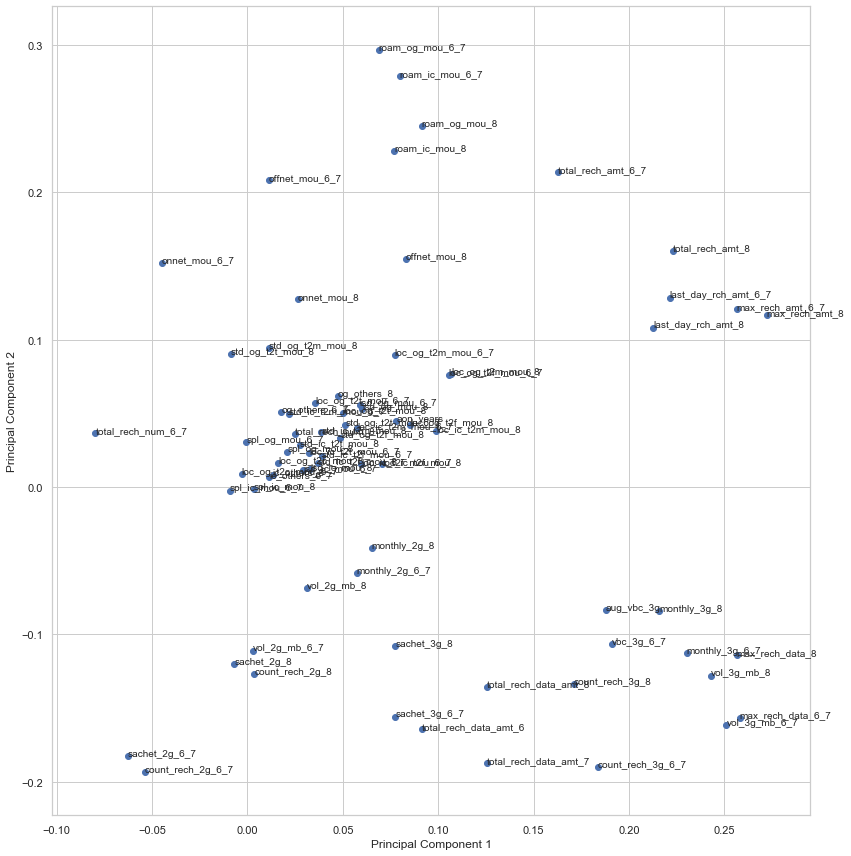

In [69]:
## Plotting PCA components

%matplotlib inline
fig = plt.figure(figsize = (12,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [70]:
pca.explained_variance_ratio_

array([9.32389234e-02, 8.94219757e-02, 6.45465268e-02, 5.99776323e-02,
       4.97375041e-02, 4.06704914e-02, 3.37439811e-02, 3.29382317e-02,
       2.96887206e-02, 2.63476648e-02, 2.42395747e-02, 2.29499537e-02,
       2.13034451e-02, 2.05689992e-02, 1.98806705e-02, 1.90052833e-02,
       1.77294283e-02, 1.63136909e-02, 1.58430676e-02, 1.49512473e-02,
       1.45461131e-02, 1.37398337e-02, 1.31347814e-02, 1.26644840e-02,
       1.21914267e-02, 1.19574238e-02, 1.11865885e-02, 1.06700391e-02,
       1.04547419e-02, 9.57112016e-03, 9.39712351e-03, 8.81112669e-03,
       8.50412770e-03, 8.46964575e-03, 8.40201744e-03, 7.62167542e-03,
       7.55639407e-03, 7.21350762e-03, 6.81053882e-03, 6.74871569e-03,
       6.06611355e-03, 5.22291027e-03, 4.94958640e-03, 4.84501768e-03,
       4.69340647e-03, 4.65905648e-03, 4.17309868e-03, 3.96700302e-03,
       3.84822115e-03, 3.70145269e-03, 3.63487299e-03, 3.56412955e-03,
       3.24925794e-03, 2.88239916e-03, 2.69797573e-03, 2.63122414e-03,
      

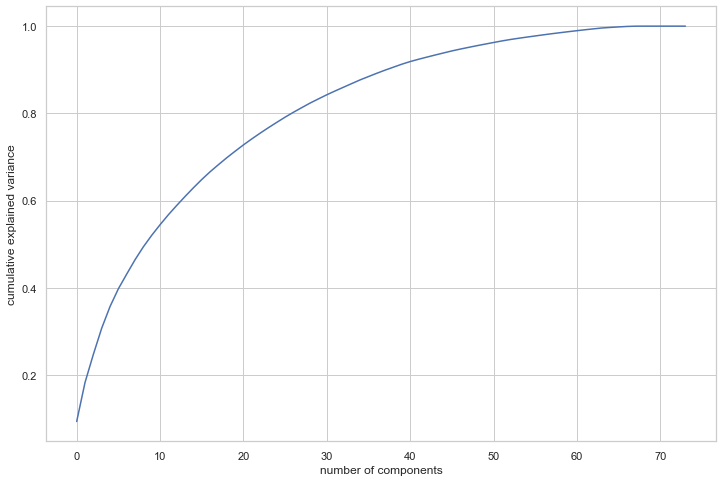

In [71]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [72]:
# micro level analysis in variance with number of componets
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 9.32, 18.26, 24.71, 30.71, 35.68, 39.75, 43.12, 46.41, 49.38,
       52.01, 54.43, 56.72, 58.85, 60.91, 62.9 , 64.8 , 66.57, 68.2 ,
       69.78, 71.28, 72.73, 74.1 , 75.41, 76.68, 77.9 , 79.1 , 80.22,
       81.29, 82.34, 83.3 , 84.24, 85.12, 85.97, 86.82, 87.66, 88.42,
       89.18, 89.9 , 90.58, 91.25, 91.86, 92.38, 92.87, 93.35, 93.82,
       94.29, 94.71, 95.11, 95.49, 95.86, 96.22, 96.58, 96.9 , 97.19,
       97.46, 97.72, 97.98, 98.23, 98.47, 98.7 , 98.93, 99.15, 99.35,
       99.54, 99.67, 99.79, 99.9 , 99.96, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97])

In [73]:
# we can observe that 40 values explain more than 90% variance

In [74]:
pca_final = PCA(n_components=40)

In [75]:
# applying pca to train data
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38618, 40)

In [76]:
corrmat = np.corrcoef(df_train_pca.transpose())

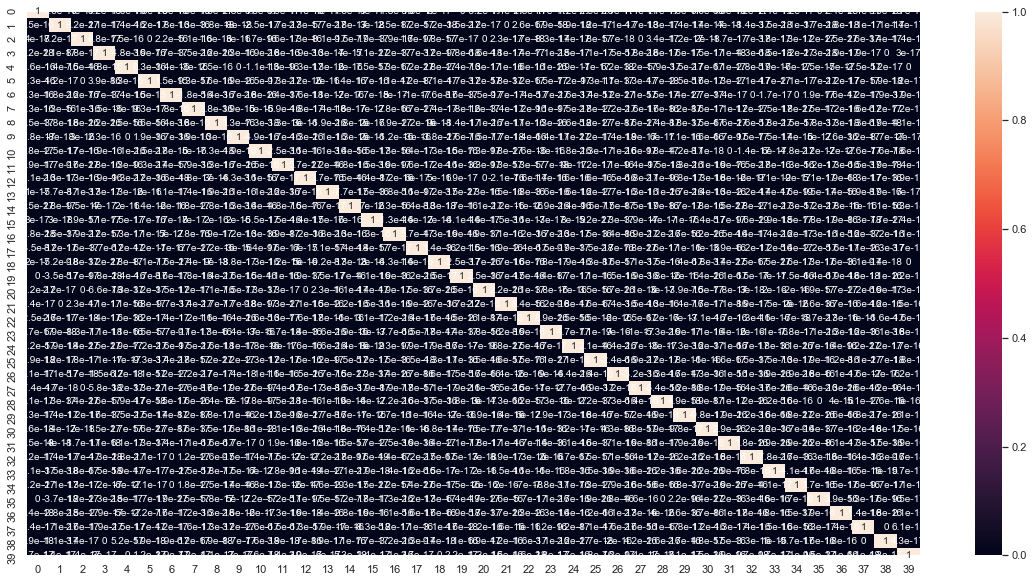

In [77]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [78]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.4652432650361236e-15 , min corr:  -8.213313122107628e-16


### Using PCA we were successfully able to remove multicolinearity between our variables

In [79]:
#Applying selected components to the test data - 40 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 40)

#### Since we want to retain customers we would like to reduce churners and hence Sensitivity is a good metic to decide which model meets our bussiness needs


### 1. PCA + Logistic regression

In [80]:
lr = LogisticRegression()
model_lr = lr.fit(df_train_pca,y_train)

**Note**

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is *linear*, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear. 

AUC:    	 0.88
[[6759 1492]
 [ 135  615]]
Sensitivity: 	0.82
Specificity: 	0.82
ROC for the test dataset 88.4%


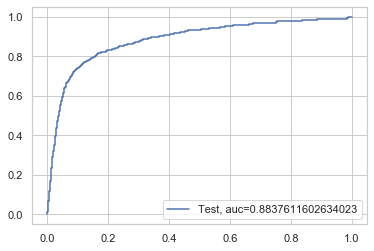

In [81]:
#Making prediction on the test data

pred_probs_test = model_lr.predict_proba(df_test_pca)[:,1]

print("AUC:    \t","{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))


#confusion matrix
cm = confusion_matrix(y_test, pred_probs_test.round())
print(cm)


# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, pred_probs_test.round(), average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


#plotting ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### thus using pca selected 40 features we were able to prict on test data
#### test data for logistic regression give good AUC of 0.88
#### the sensitivity is also high which tells us that it is a well balanced model

### 2.  PCA + Random forest

In [82]:
#defining a variable for randomforestclassifier
rfc = RandomForestClassifier()

In [83]:
#fitting our random forest classifier on the principal components data
model_rf_pca = rfc.fit(df_train_pca, y_train)

In [84]:
# Making predictions
pred_rf_pca = rfc.predict(df_test_pca)

In [85]:
# Let's check the report of our default model
print(classification_report(y_test,pred_rf_pca))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8251
           1       0.46      0.51      0.48       750

    accuracy                           0.91      9001
   macro avg       0.71      0.73      0.72      9001
weighted avg       0.91      0.91      0.91      9001



In [86]:
# Printing confusion matrix
print(confusion_matrix(y_test,pred_rf_pca))

[[7800  451]
 [ 368  382]]


Sensitivity: 	0.51
Specificity: 	0.95
0.9090101099877791
AUC:    	 0.73
ROC for the test dataset 72.7%


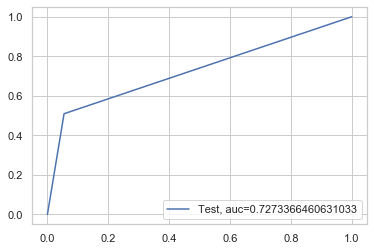

In [87]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, pred_rf_pca, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

print(accuracy_score(y_test,pred_rf_pca))


"{:2.2}".format(metrics.roc_auc_score(y_test,pred_rf_pca))
print("AUC:    \t","{:2.2}".format(metrics.roc_auc_score(y_test,pred_rf_pca)))

#plotting ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_rf_pca)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [88]:
### we onserve that random forest gives lower AUC (0.79) than logistic regression and the sensitivity is also low(0.7)
## however there are ways to impore randomforest models

In [89]:
## Randomforest with GridSearcv (Hyper parameter tuning)

In [90]:
# tuning max depth


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [91]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.48,0.07,0.01,0.00,2,{'max_depth': 2},0.76,0.77,0.77,0.77,0.75,0.76,0.01,4,0.76,0.76,0.77,0.77,0.75,0.76,0.01
1,3961.22,7919.91,0.01,0.00,7,{'max_depth': 7},0.84,0.85,0.85,0.84,0.85,0.84,0.00,3,0.86,0.86,0.86,0.86,0.86,0.86,0.00
2,1.88,0.11,0.02,0.00,12,{'max_depth': 12},0.91,0.91,0.91,0.91,0.91,0.91,0.00,2,0.95,0.95,0.95,0.95,0.95,0.95,0.00
3,2.14,0.08,0.02,0.00,17,{'max_depth': 17},0.94,0.94,0.94,0.93,0.93,0.93,0.00,1,0.98,0.98,0.98,0.98,0.98,0.98,0.00


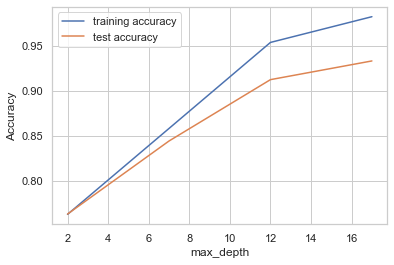

In [92]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [93]:
#Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1, 10, 1)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [94]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.11,0.01,0.00,0.00,1,{'n_estimators': 1},0.73,0.75,0.76,0.71,0.76,0.74,0.02,9,0.75,0.74,0.76,0.72,0.76,0.74,0.02
1,0.18,0.00,0.00,0.00,2,{'n_estimators': 2},0.76,0.76,0.77,0.73,0.76,0.76,0.01,8,0.77,0.76,0.78,0.74,0.77,0.76,0.01
2,0.27,0.02,0.00,0.00,3,{'n_estimators': 3},0.78,0.79,0.79,0.78,0.79,0.79,0.01,7,0.79,0.79,0.78,0.78,0.78,0.78,0.00
3,0.32,0.01,0.00,0.00,4,{'n_estimators': 4},0.78,0.79,0.79,0.79,0.79,0.79,0.00,5,0.80,0.79,0.79,0.80,0.79,0.79,0.00
4,0.42,0.04,0.01,0.00,5,{'n_estimators': 5},0.78,0.79,0.79,0.79,0.78,0.79,0.00,6,0.79,0.79,0.79,0.80,0.78,0.79,0.01


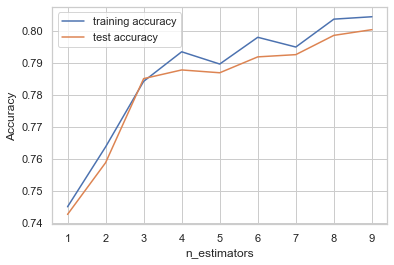

In [95]:
# plotting accuracies
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [96]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10, 15, 20, 25, 30]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [97]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.26,0.10,0.01,0.00,10,{'max_features': 10},0.80,0.80,0.81,0.81,0.81,0.80,0.00,2,0.81,0.81,0.81,0.81,0.80,0.81,0.00
1,1.81,0.04,0.01,0.00,15,{'max_features': 15},0.80,0.81,0.80,0.81,0.81,0.81,0.00,1,0.81,0.81,0.81,0.81,0.81,0.81,0.00
2,2.51,0.07,0.01,0.00,20,{'max_features': 20},0.78,0.81,0.80,0.81,0.80,0.80,0.01,3,0.80,0.81,0.80,0.81,0.80,0.81,0.00
3,3.10,0.07,0.01,0.00,25,{'max_features': 25},0.78,0.80,0.80,0.81,0.80,0.80,0.01,5,0.79,0.80,0.81,0.81,0.80,0.80,0.01
4,4.64,1.02,0.01,0.00,30,{'max_features': 30},0.79,0.79,0.80,0.81,0.81,0.80,0.01,4,0.80,0.80,0.80,0.80,0.81,0.80,0.00


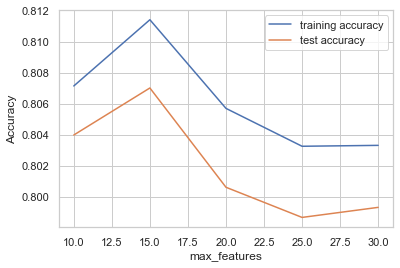

In [98]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [99]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7,12,16],
    'n_estimators': [3,5,7], 
    'max_features': [15, 20,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [100]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9193640271376042 using {'max_depth': 16, 'max_features': 15, 'n_estimators': 7}


In [101]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=16,
                             max_features=20,
                             n_estimators=7)

In [102]:
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
# predict
predictions = rfc.predict(df_test_pca)

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      8251
           1       0.38      0.63      0.48       750

    accuracy                           0.89      9001
   macro avg       0.67      0.77      0.71      9001
weighted avg       0.92      0.89      0.90      9001



In [105]:
print(confusion_matrix(y_test,predictions))

[[7496  755]
 [ 279  471]]


Sensitivity: 	0.63
Specificity: 	0.91
0.8851238751249861
AUC:    	 0.77
ROC for the test dataset 76.8%


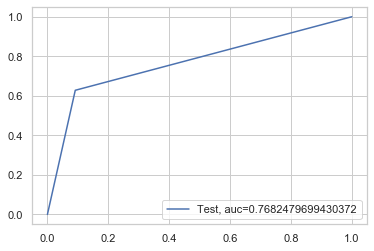

In [106]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

print(accuracy_score(y_test,predictions))


"{:2.2}".format(metrics.roc_auc_score(y_test,predictions))
print("AUC:    \t","{:2.2}".format(metrics.roc_auc_score(y_test,predictions)))

#plotting ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test,predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [107]:
## we can observe that when we tune hyper parameters
## the AUC increases to 0.83 and sensitivity also increases

### 3. PCA + Non Linear SVM

In [108]:
## Introducing SVM
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

<IPython.core.display.Javascript object>

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
preds_SVM_RBF = svm_rbf.predict(X_test)

Sensitivity: 	0.77
Specificity: 	0.89
0.8772358626819242
AUC:    	 0.83
ROC for the test dataset 83.0%


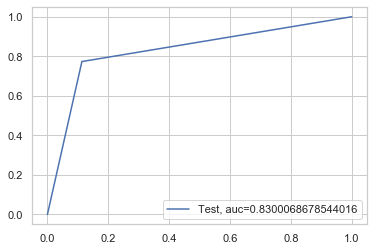

In [110]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,preds_SVM_RBF, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print(accuracy_score(y_test,preds_SVM_RBF))

"{:2.2}".format(metrics.roc_auc_score(y_test,preds_SVM_RBF))
print("AUC:    \t","{:2.2}".format(metrics.roc_auc_score(y_test,preds_SVM_RBF)))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_SVM_RBF)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [111]:
## Non linear svm gives a decent model but not better than Logistic regression

## PCA + LR


AUC:  0.88

[[6750 1501]
 [ 135  615]]
 
Sensitivity: 	0.82
Specificity: 	0.82
ROC for the test dataset 88.3%


## PCA+ RFC

[[7610  641]
 [ 181  569]]
 
Sensitivity: 	0.76
Specificity: 	0.92
acc  0.9086768136873681
AUC:    	 0.84
ROC for the test dataset 84.0%


## PCA+ SVM

Sensitivity: 	0.77
Specificity: 	0.88
acc  0.8754582824130652
AUC:    	 0.83
ROC for the test dataset 82.8%

### Thus we can conclude that Logistic regression with pca gives the best model that we can use for predictions
### This is because Lr+PCA has very balanced sensitivity and high accuracy along with high AUC

### For bussiness understanding and decision making we need a model that is interpretable and clearly defines all the features that affect churn.

Hence we build a model for sole purpose of feature understanding as features via PCA are not interpretable we use the
random forest to see how each features affects churn

In [112]:
X_train.shape

(38618, 74)

In [113]:
rfc = RandomForestClassifier()

In [114]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
# Making predictions
predictions = rfc.predict(X_test)

In [116]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8251
           1       0.57      0.62      0.59       750

    accuracy                           0.93      9001
   macro avg       0.77      0.79      0.78      9001
weighted avg       0.93      0.93      0.93      9001



In [117]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7903  348]
 [ 286  464]]


Sensitivity: 	0.62
Specificity: 	0.96
0.9295633818464615
AUC:    	 0.79
ROC for the test dataset 78.8%


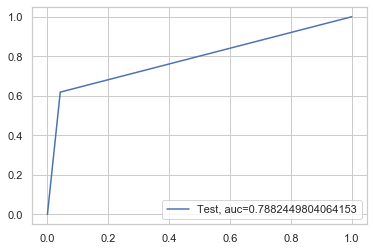

In [118]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print(accuracy_score(y_test,predictions))

"{:2.2}".format(metrics.roc_auc_score(y_test,predictions))
print("AUC:    \t","{:2.2}".format(metrics.roc_auc_score(y_test,predictions)))

fpr, tpr, threshold = metrics.roc_curve(y_test,predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [119]:
#GridSearchCV to find max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.29,0.02,0.01,0.00,2,{'max_depth': 2},0.83,0.84,0.82,0.86,0.83,0.84,0.01,4,0.85,0.84,0.82,0.86,0.82,0.84,0.01
1,0.74,0.01,0.02,0.00,7,{'max_depth': 7},0.88,0.90,0.90,0.90,0.91,0.90,0.01,3,0.91,0.91,0.91,0.91,0.91,0.91,0.00
2,1.09,0.02,0.02,0.00,12,{'max_depth': 12},0.93,0.94,0.95,0.94,0.94,0.94,0.01,2,0.97,0.97,0.97,0.97,0.97,0.97,0.00
3,1.27,0.01,0.02,0.00,17,{'max_depth': 17},0.93,0.96,0.96,0.95,0.95,0.95,0.01,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


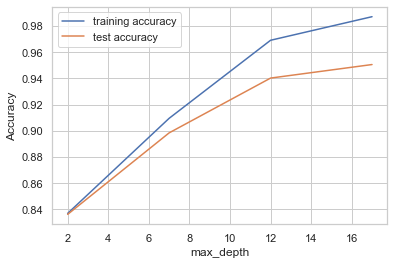

In [121]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [122]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1, 10, 1)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.17,0.01,0.01,0.00,1,{'n_estimators': 1},0.86,0.89,0.90,0.90,0.90,0.89,0.01,9,0.96,0.96,0.96,0.96,0.96,0.96,0.00
1,0.31,0.01,0.01,0.00,2,{'n_estimators': 2},0.86,0.91,0.90,0.90,0.90,0.90,0.02,8,0.97,0.97,0.96,0.96,0.96,0.96,0.00
2,0.44,0.02,0.04,0.07,3,{'n_estimators': 3},0.91,0.94,0.94,0.94,0.94,0.93,0.01,7,0.99,0.99,0.99,0.99,0.99,0.99,0.00
3,0.60,0.02,0.01,0.00,4,{'n_estimators': 4},0.90,0.95,0.94,0.94,0.94,0.93,0.02,6,0.99,0.99,0.99,0.99,0.99,0.99,0.00
4,0.73,0.02,0.01,0.00,5,{'n_estimators': 5},0.92,0.95,0.95,0.95,0.95,0.94,0.01,5,0.99,0.99,0.99,0.99,0.99,0.99,0.00


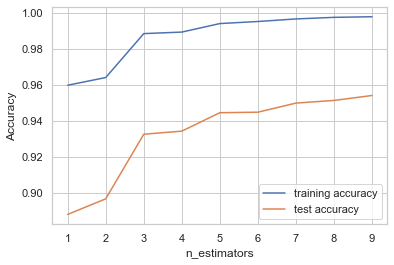

In [124]:
# plotting accuracies with N_estimaters
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [125]:
# GridSearchCV to find optimal features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10,15,20,25,30]} 

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [126]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.82,0.01,0.02,0.00,10,{'max_features': 10},0.93,0.96,0.96,0.96,0.96,0.95,0.01,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
1,2.84,0.13,0.02,0.01,15,{'max_features': 15},0.93,0.96,0.97,0.96,0.96,0.95,0.01,4,1.00,1.00,1.00,1.00,1.00,1.00,0.00
2,3.86,0.04,0.02,0.00,20,{'max_features': 20},0.93,0.96,0.96,0.96,0.96,0.95,0.01,3,1.00,1.00,1.00,1.00,1.00,1.00,0.00
3,4.82,0.13,0.02,0.00,25,{'max_features': 25},0.93,0.96,0.96,0.95,0.96,0.95,0.01,4,1.00,1.00,1.00,1.00,1.00,1.00,0.00
4,5.90,0.20,0.02,0.00,30,{'max_features': 30},0.93,0.96,0.96,0.96,0.96,0.95,0.01,2,1.00,1.00,1.00,1.00,1.00,1.00,0.00


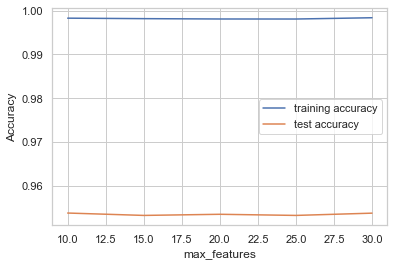

In [127]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [128]:
# Create the parameter grid based on the results of random search  
param_grid = {     'max_depth': [2,4,6],
                   'n_estimators': [1,2,3],
                   'max_features': [5,15,25] } 

# Create a based model 
rf = RandomForestClassifier() 

# Instantiate the grid search 
gs_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1,verbose = 1) 

# Fit the grid search to the data grid_search.fit(X_train, y_train) 
gs_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [129]:
print('We can get accuracy of',gs_search.best_score_,'using',gs_search.best_params_)

We can get accuracy of 0.8845616033973794 using {'max_depth': 6, 'max_features': 25, 'n_estimators': 3}


In [130]:
## since we are building this model to find out appropriate features to identify 
## churners we dont need to make predictions on this model

In [131]:
# printing the important features in order
importances = rfc.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,0.08,total_rech_amt_8
1,0.07,loc_ic_t2m_mou_8
2,0.06,total_rech_num_8
3,0.05,max_rech_data_8
4,0.05,roam_og_mou_8
5,0.05,roam_ic_mou_8
6,0.05,loc_og_t2m_mou_8
7,0.04,loc_ic_t2f_mou_8
8,0.04,max_rech_amt_8
9,0.03,last_day_rch_amt_8


In [132]:
print(max(rfc.feature_importances_))

0.08211433057812184


## Features that are highly important in predicting churn are :

## Driver variables

1. roam_ic_mou_8
2. total_rech_amt_8
3. last_day_rch_amt_8
4. roam_og_mou_8
5.	loc_ic_t2m_mou_8
6.	loc_og_t2t_mou_8
7.	loc_og_t2m_mou_8
8.	total_rech_num_8
9.	max_rech_amt_8
10.	offnet_mou_8
11. total_rech_data_amt_8


## Bussiness insights

1. company can introduce new roaming packs to target the customers that travel abroad freely such that they dont have to pay huge bills and making incoming calls when roaming as cheap as possible

2. Focusing on the recharge amounts for the 8th month company can identify possiblechurners and can thus direvrt attension to such users with attractive packs.

3. Provide additional offers in talktime for local outgoing calls to other operaors

4. provide extra data on data rechrges to attract customers as internet is the most important thing in today's world

5. For those customers who are doing small data recharges company can provide attractive offers that provide additional data.

6. HOWEVER the main focus should be on the 8th month as that is the action phase and company can talk to those customers who are inactive and address their concerns